# RANDOM_FOREST_WITH_HYPERPAREMETER_TUNNING

## ABOUT_DATASET
__Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists.__

__Education__
    1 'Below College'
    2 'College'
    3 'Bachelor'
    4 'Master'
    5 'Doctor'

__EnvironmentSatisfaction__
    1 'Low'
    2 'Medium'
    3 'High'
    4 'Very High'
    
__JobInvolvement__
    1 'Low'
    2 'Medium'
    3 'High'
    4 'Very High'
    
__JobSatisfaction__
    1 'Low'
    2 'Medium'
    3 'High'
    4 'Very High'
    
__PerformanceRating__
    1 'Low'
    2 'Good'
    3 'Excellent'
    4 'Outstanding'
    
__RelationshipSatisfaction__
    1 'Low'
    2 'Medium'
    3 'High'
    4 'Very High'

__WorkLifeBalance__
    1 'Bad'
    2 'Good'
    3 'Better'
    4 'Best'

<img align="top"  width="1100" height="400" src="https://media.springernature.com/full/springer-static/image/art%3A10.1007%2Fs10706-017-0420-8/MediaObjects/10706_2017_420_Fig7_HTML.gif">

## IMPORTING LIB.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## IMPORTING DATASET

In [2]:
data=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## DATA INSIGHTS

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## COLUMNS 

In [5]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

## TARGET_VALUE

In [6]:
data.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

## NULL DATA

In [45]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [8]:
data.shape

(1470, 35)

# DATA VISUALIZATION SECTION

## IMPORTING KLIB FOR VISUALIZATION

In [9]:
import klib

GridSpec(6, 9)

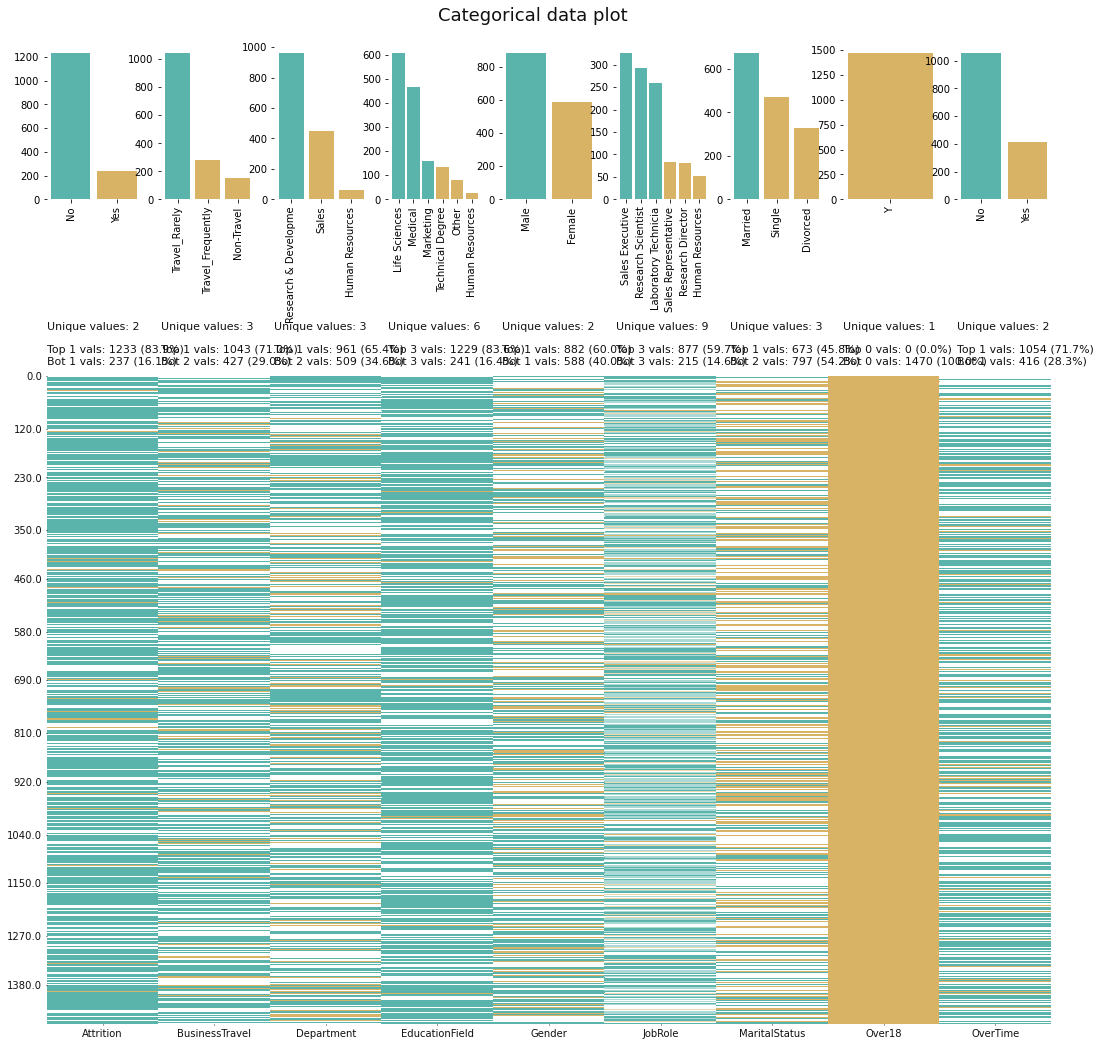

In [10]:
klib.describe
klib.cat_plot(data)

Note: The number of non binary numerical features is very large (23), please consider splitting the data. Showing plots for the first 20 numerical features. Override this by setting showall=True.


<AxesSubplot:xlabel='YearsAtCompany', ylabel='Density'>

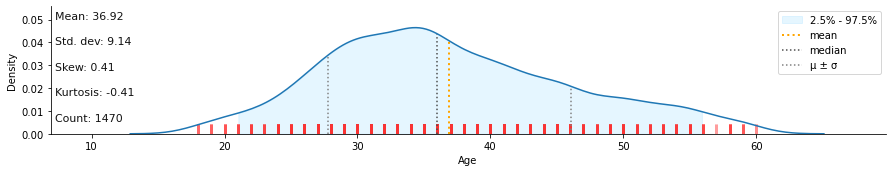

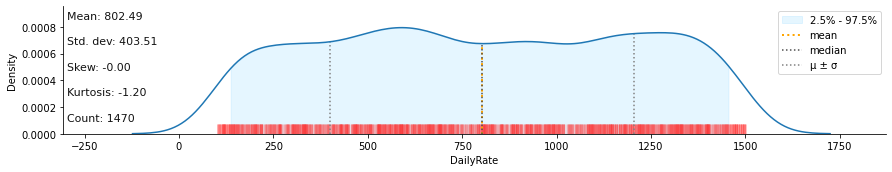

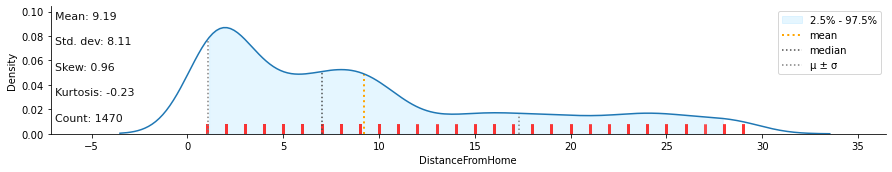

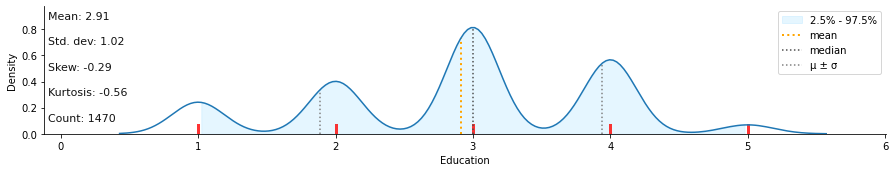

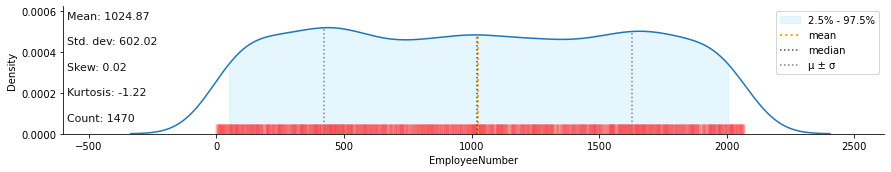

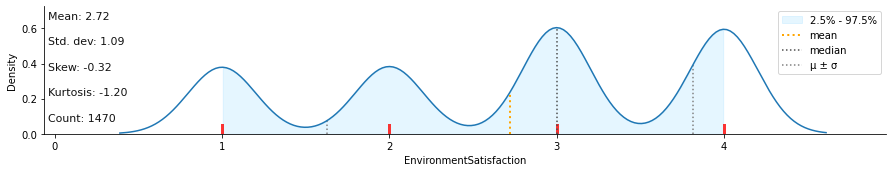

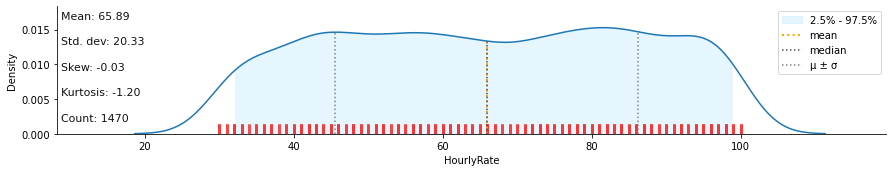

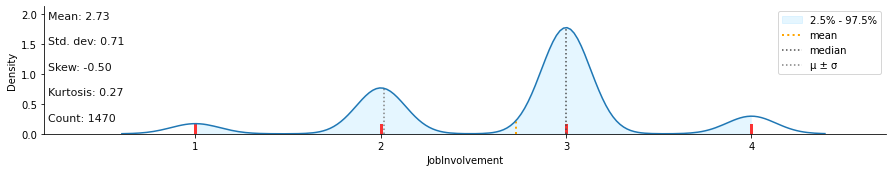

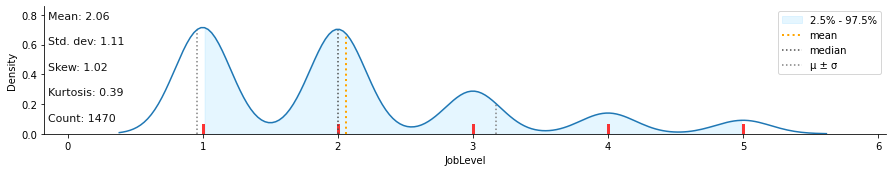

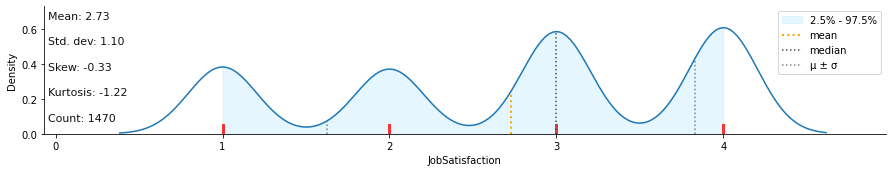

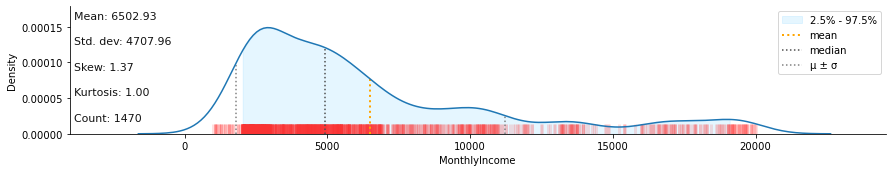

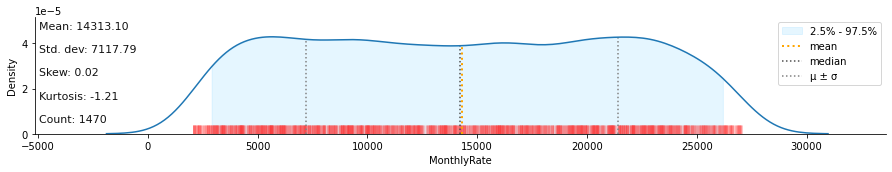

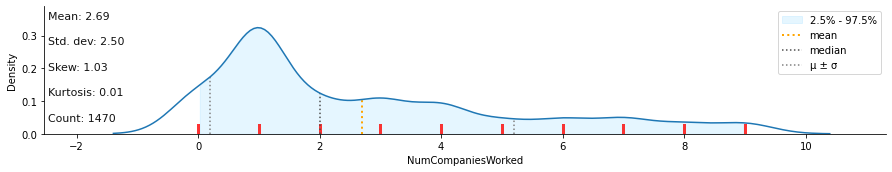

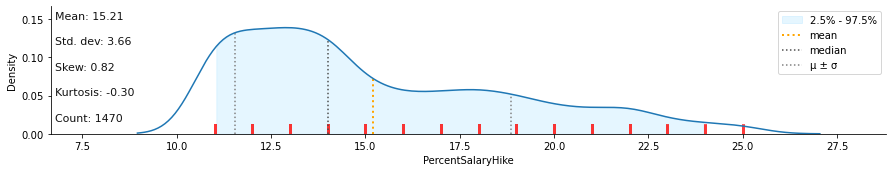

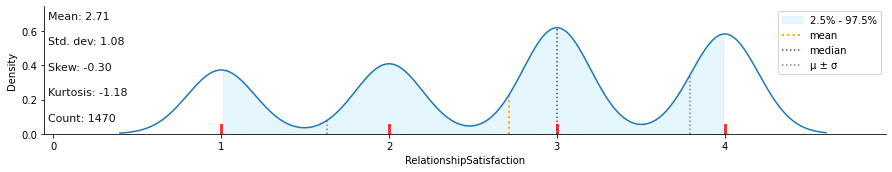

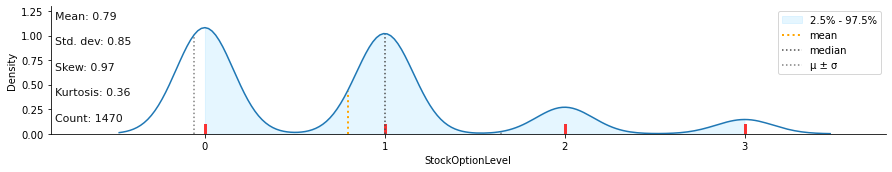

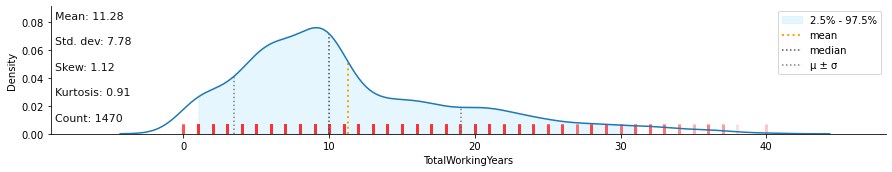

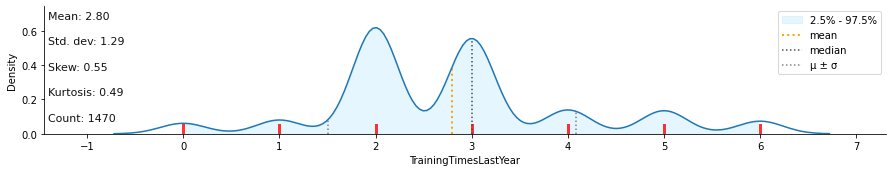

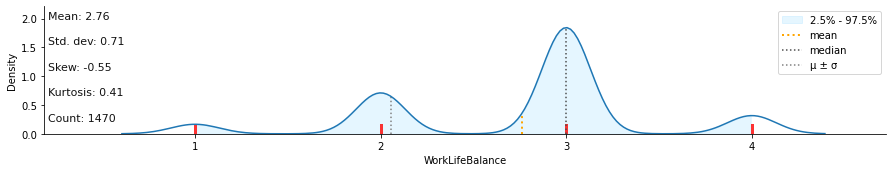

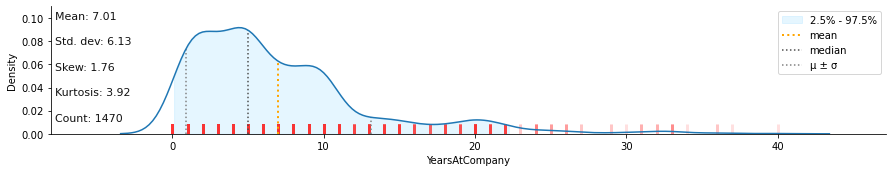

In [11]:
klib.dist_plot(data)

In [12]:
klib.corr_mat(data)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.00,0.01,-0.00,0.21,-,-0.01,0.01,0.02,0.03,0.51,-0.00,0.50,0.03,0.30,0.00,0.00,0.05,-,0.04,0.68,-0.02,-0.02,0.31,0.21,0.22,0.20
DailyRate,0.01,1.00,-0.00,-0.02,-,-0.05,0.02,0.02,0.05,0.00,0.03,0.01,-0.03,0.04,0.02,0.00,0.01,-,0.04,0.01,0.00,-0.04,-0.03,0.01,-0.03,-0.03
DistanceFromHome,-0.00,-0.00,1.00,0.02,-,0.03,-0.02,0.03,0.01,0.01,-0.00,-0.02,0.03,-0.03,0.04,0.03,0.01,-,0.04,0.00,-0.04,-0.03,0.01,0.02,0.01,0.01
Education,0.21,-0.02,0.02,1.00,-,0.04,-0.03,0.02,0.04,0.10,-0.01,0.09,-0.03,0.13,-0.01,-0.02,-0.01,-,0.02,0.15,-0.03,0.01,0.07,0.06,0.05,0.07
EmployeeCount,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
EmployeeNumber,-0.01,-0.05,0.03,0.04,-,1.00,0.02,0.04,-0.01,-0.02,-0.05,-0.01,0.01,-0.00,-0.01,-0.02,-0.07,-,0.06,-0.01,0.02,0.01,-0.01,-0.01,-0.01,-0.01
EnvironmentSatisfaction,0.01,0.02,-0.02,-0.03,-,0.02,1.00,-0.05,-0.01,0.00,-0.01,-0.01,0.04,0.01,-0.03,-0.03,0.01,-,0.00,-0.00,-0.02,0.03,0.00,0.02,0.02,-0.00
HourlyRate,0.02,0.02,0.03,0.02,-,0.04,-0.05,1.00,0.04,-0.03,-0.07,-0.02,-0.02,0.02,-0.01,-0.00,0.00,-,0.05,-0.00,-0.01,-0.00,-0.02,-0.02,-0.03,-0.02
JobInvolvement,0.03,0.05,0.01,0.04,-,-0.01,-0.01,0.04,1.00,-0.01,-0.02,-0.02,-0.02,0.02,-0.02,-0.03,0.03,-,0.02,-0.01,-0.02,-0.01,-0.02,0.01,-0.02,0.03
JobLevel,0.51,0.00,0.01,0.10,-,-0.02,0.00,-0.03,-0.01,1.00,-0.00,0.95,0.04,0.14,-0.03,-0.02,0.02,-,0.01,0.78,-0.02,0.04,0.53,0.39,0.35,0.38


<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

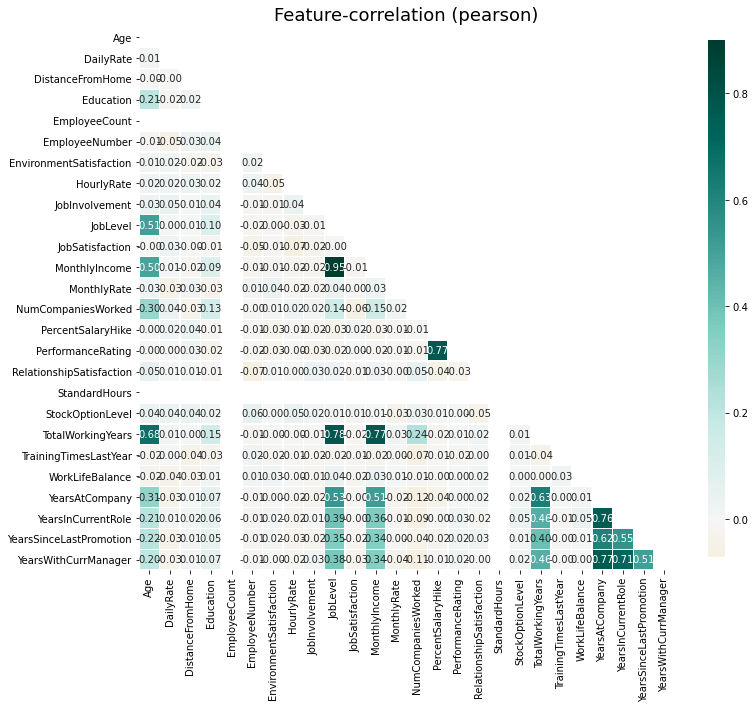

In [13]:
klib.corr_plot(data)

In [14]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

## DROPING VALUES

In [15]:
data.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

## SEPEARATING CETEGORIAL AND NUMERICAL DATA

In [16]:
categorical_data = []
for column in data.columns:
    if data[column].dtype == object and len(data[column].unique()) <= 50:
        categorical_data.append(column)

In [17]:
print('There are {} categorical variables\n'.format(len(categorical_data)))

print('The categorical variables are :\n\n', categorical_data)


There are 8 categorical variables

The categorical variables are :

 ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


In [18]:
Numerical_data=[var for var in data.columns if data[var].dtype=='int64']
print('There are {} Numerical variables\n'.format(len(Numerical_data)))

print('The Numerical variables are :\n\n', Numerical_data)

There are 23 Numerical variables

The Numerical variables are :

 ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [19]:
data['Attrition'] = data.Attrition.astype("category").cat.codes

In [20]:
categorical_data.remove('Attrition')

In [21]:
data[categorical_data].head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No


## PIE_PLOT

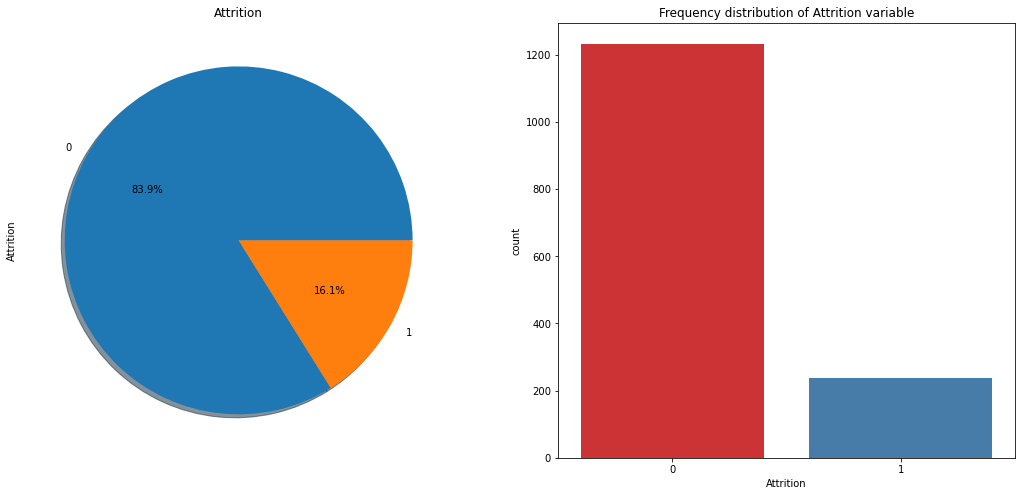

In [22]:
f,ax=plt.subplots(1,2,figsize=(18,8))

ax[0] = data['Attrition'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Attrition')


#f, ax = plt.subplots(figsize=(6, 8))
ax[1] = sns.countplot(x="Attrition", data=data, palette="Set1")
ax[1].set_title("Frequency distribution of Attrition variable")

plt.show()


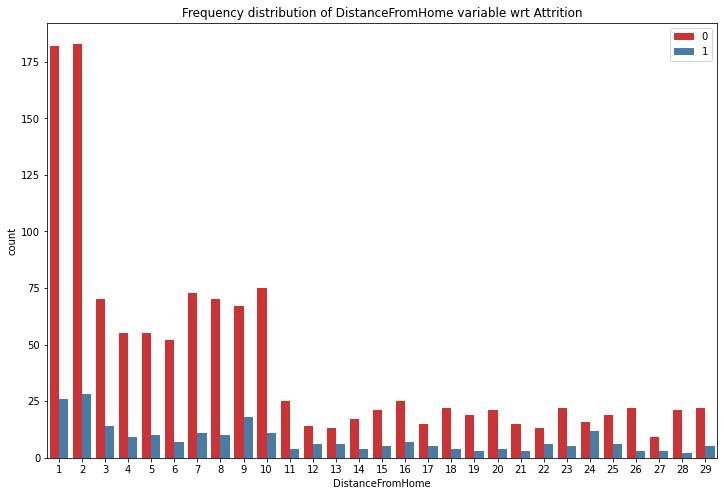

In [23]:
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(x="DistanceFromHome", hue="Attrition", data=data, palette="Set1")
ax.set_title("Frequency distribution of DistanceFromHome variable wrt Attrition")
ax.legend(loc='upper right')
plt.show()

## FEACTURE ENGINERING

In [25]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
for column in categorical_data:
    data[column] = label.fit_transform(data[column])

## DATA FOR FURTURE MODEL PREDICTION

In [26]:
from sklearn.model_selection import train_test_split

X = data.drop('Attrition', axis=1)
Y = data.Attrition

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

## PREDICTION THROUGH RANDOM_FOREST 

In [27]:
from sklearn.ensemble import RandomForestClassifier
Rf_classifier=RandomForestClassifier(n_estimators=10).fit(X_train,Y_train)
prediction=Rf_classifier.predict(X_test)

In [28]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [29]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(Y_test,prediction))
print(accuracy_score(Y_test,prediction))
print(classification_report(Y_test,prediction))

[[365   6]
 [ 54  16]]
0.8639455782312925
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       371
           1       0.73      0.23      0.35        70

    accuracy                           0.86       441
   macro avg       0.80      0.61      0.64       441
weighted avg       0.85      0.86      0.83       441



__The main parameters used by a Random Forest Classifier are:__

    * criterion = the function used to evaluate the quality of a split.
    * max_depth = maximum number of levels allowed in each tree.
    * max_features = maximum number of features considered when splitting a node.
    * min_samples_leaf = minimum number of samples which can be stored in a tree leaf.
    * min_samples_split = minimum number of samples necessary in a node to cause node splitting.
    * n_estimators = number of trees in the ensamble.

# HYPERPARAMETER TUNNING 

## Manual_hyper tuning

__In manual hypertunning we select manual extimators of random_forest__

<img align="top"  width="900" height="400" src="https://miro.medium.com/max/1838/1*yHNmVkf43eTJF5QDebUltQ.png">

In [30]:
Manual_model=RandomForestClassifier(n_estimators=500,criterion='gini',max_features='sqrt',min_samples_leaf=10,random_state=101)
Manual_model.fit(X_train,Y_train)
predictions=Manual_model.predict(X_test)
print(confusion_matrix(Y_test,prediction))
print(accuracy_score(Y_test,prediction))
print(classification_report(Y_test,prediction))

[[365   6]
 [ 54  16]]
0.8639455782312925
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       371
           1       0.73      0.23      0.35        70

    accuracy                           0.86       441
   macro avg       0.80      0.61      0.64       441
weighted avg       0.85      0.86      0.83       441



## Randomised_search_cv

In [31]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators=[int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
min_samples_split = [2, 5, 10,14]
min_samples_leaf = [1, 2, 4,6,8]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [32]:
Rf=RandomForestClassifier()
random_cv=RandomizedSearchCV(estimator=Rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
random_cv.fit(X_train,Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [33]:
random_cv.best_params_

{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 230,
 'criterion': 'gini'}

In [34]:
best_random_grid=random_cv.best_estimator_

In [35]:
from sklearn.metrics import accuracy_score
Y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(Y_test,Y_pred))
print("Accuracy Score {}".format(accuracy_score(Y_test,Y_pred)))
print("Classification report: {}".format(classification_report(Y_test,Y_pred)))

[[362   9]
 [ 61   9]]
Accuracy Score 0.8412698412698413
Classification report:               precision    recall  f1-score   support

           0       0.86      0.98      0.91       371
           1       0.50      0.13      0.20        70

    accuracy                           0.84       441
   macro avg       0.68      0.55      0.56       441
weighted avg       0.80      0.84      0.80       441



In [36]:
random_cv.best_params_

{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 230,
 'criterion': 'gini'}

##  GridSearchCV

In [38]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'criterion': [random_cv.best_params_['criterion']],
    'max_depth': [random_cv.best_params_['max_depth']],
    'max_features': [random_cv.best_params_['max_features']],
    'min_samples_leaf': [random_cv.best_params_['min_samples_leaf'], 
                         random_cv.best_params_['min_samples_leaf']+2, 
                         random_cv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [random_cv.best_params_['min_samples_split'] - 2,
                          random_cv.best_params_['min_samples_split'] - 1,
                          random_cv.best_params_['min_samples_split'], 
                          random_cv.best_params_['min_samples_split'] +1,
                          random_cv.best_params_['min_samples_split'] + 2],
    'n_estimators': [random_cv.best_params_['n_estimators'] - 200, random_cv.best_params_['n_estimators'] - 100, 
                     random_cv.best_params_['n_estimators'], 
                     random_cv.best_params_['n_estimators'] + 100, random_cv.best_params_['n_estimators'] + 200]
}
print(param_grid)

{'criterion': ['gini'], 'max_depth': [230], 'max_features': ['sqrt'], 'min_samples_leaf': [1, 3, 5], 'min_samples_split': [0, 1, 2, 3, 4], 'n_estimators': [1200, 1300, 1400, 1500, 1600]}


In [39]:
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,Y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [230],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [0, 1, 2, 3, 4],
                         'n_estimators': [1200, 1300, 1400, 1500, 1600]},
             verbose=2)

In [40]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=230, max_features='sqrt', n_estimators=1200)

In [42]:
best_grid=grid_search.best_estimator_

In [43]:
best_grid

RandomForestClassifier(max_depth=230, max_features='sqrt', n_estimators=1200)

In [44]:
y_pred=best_grid.predict(X_test)
print(confusion_matrix(Y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(Y_test,y_pred)))
print("Classification report: {}".format(classification_report(Y_test,y_pred)))

[[363   8]
 [ 60  10]]
Accuracy Score 0.8458049886621315
Classification report:               precision    recall  f1-score   support

           0       0.86      0.98      0.91       371
           1       0.56      0.14      0.23        70

    accuracy                           0.85       441
   macro avg       0.71      0.56      0.57       441
weighted avg       0.81      0.85      0.81       441



## THE END !!